(1006, 7)


C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_11532\808251915.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  setDatos.drop(["Fecha"], 1).hist()


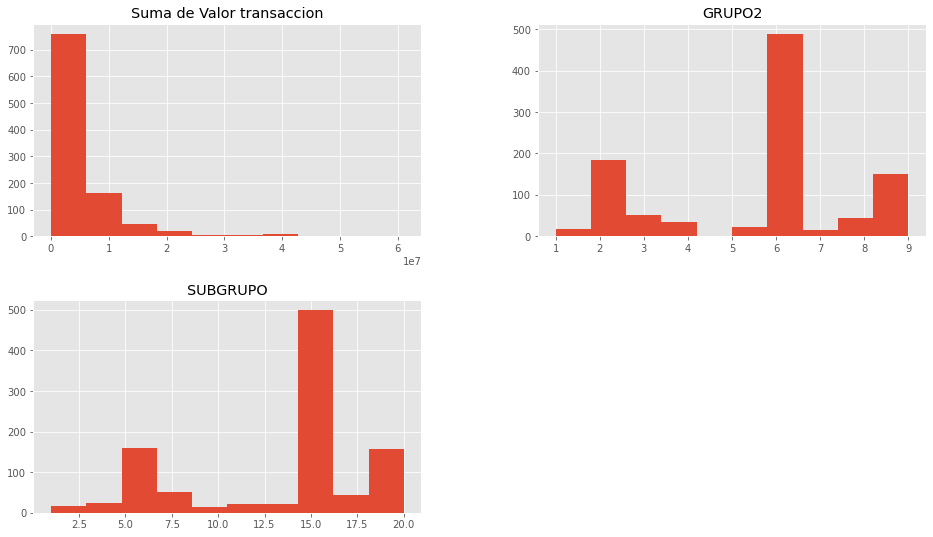

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


#cargamos los datos de entrada
setDatos = pd.read_csv("tabla datos2.csv")
#veamos cuantas dimensiones y registros contiene
print(setDatos.shape)

#Visualizamos rápidamente las caraterísticas de entrada
setDatos.drop(["Fecha"], 1).hist()
plt.show()

In [2]:
#Mostrar el set De datos, que ya se ordeno por Fecha dataTime
setDatos

,Fecha,Suma de Valor transaccion,GRUPO,SUB GRUPO,NAL/INTERNAL,GRUPO2,SUBGRUPO
0,01/01/2018,10000,Evento festivo,dias de descanso,Nacional,3,7
1,15/01/2018,100000,Evento Siniestro,Afectacion directa,Nacional,4,9
2,19/01/2018,120000,Evento economico,Comercio internacional,Internacional,6,15
3,26/01/2018,150000,Evento politico,Internacional,Internacional,2,5
4,31/01/2018,60000,Evento economico,Comercio internacional,Internacional,6,15
...,...,...,...,...,...,...,...
1001,27/12/2021,6286000,Evento deportivo,Alto impacto,Nacional,1,1
1002,28/12/2021,7785846,Evento politico,Internacional,Internacional,2,5
1003,29/12/2021,14767000,Evento politico,Consultas y decisiones,Nacional,2,6
1004,30/12/2021,12700000,Evento de salud publica,Pandemia Covid - 19,Nacional,9,20


In [3]:
#para Cada Dato por subGrupo Crear una lista de nuevos set de datos
def extraerSubGrupos(data, idSubGrupo):
    return data[(data["SUBGRUPO"] == idSubGrupo )]


#Sacar todos los subgrupos
tiposSubGrupos = setDatos["SUBGRUPO"].unique() #.columns.unique()

#Ordenar los subgrupos para que salgan en orden
tiposSubGrupos=sorted(tiposSubGrupos)

#Extraer los datos por cada subgrupo
SubGrupos = list()
colores = list()

#Repositorio de colores para plotear mcolors.CSS4_COLORS con todos los colores css
coloresDisponibles = list(map(str, mcolors.CSS4_COLORS.values()))



for subGrupo in tiposSubGrupos:
    #  Iniciar la extraccion en cada dataset
    SubGrupos.append(extraerSubGrupos(setDatos, subGrupo))
    
    #Agregar los colores para cada grafico despues del 14
    colores.append(coloresDisponibles[subGrupo+30])

    
#Mostrar el tamaño
print(len(SubGrupos))

#Mostral la lista de Subgrupos
print(tiposSubGrupos)

#motrar el suggrupo por el indice que usted escoja
SubGrupos[0]



20
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


,Fecha,Suma de Valor transaccion,GRUPO,SUB GRUPO,NAL/INTERNAL,GRUPO2,SUBGRUPO
178,17/04/2019,75000,Evento deportivo,Alto impacto,Nacional,1,1
734,04/04/2021,3599000,Evento deportivo,Alto impacto,Internacional,1,1
790,30/05/2021,3350000,Evento deportivo,Alto impacto,Internacional,1,1
802,11/06/2021,3900000,Evento deportivo,Alto impacto,Internacional,1,1
805,14/06/2021,2450000,Evento deportivo,Alto impacto,Internacional,1,1
830,09/07/2021,4775000,Evento deportivo,Alto impacto,Internacional,1,1
840,19/07/2021,5175000,Evento deportivo,Alto impacto,Nacional,1,1
842,21/07/2021,16737000,Evento deportivo,Alto impacto,Internacional,1,1
847,26/07/2021,3316528,Evento deportivo,Alto impacto,Internacional,1,1
881,29/08/2021,3165000,Evento deportivo,Alto impacto,Internacional,1,1


In [15]:
from datetime import datetime
from sklearn.linear_model import LinearRegression

data = SubGrupos[0]
#data["Fecha"] = data['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
data['Fecha_Num'] = data['Fecha'].apply(lambda x: x.toordinal())

X = data[['Fecha_Num']]
y = data['Suma de Valor transaccion']


regression_model = LinearRegression()
regression_model.fit(X, y)

# Coeficientes y término independiente
coeficientes = regression_model.coef_
intercepto = regression_model.intercept_

# Predicciones
predicciones = regression_model.predict(X)

# Formatear las fechas como cadenas de texto
fechas = data['Fecha'].apply(lambda x: x.strftime('%Y-%m-%d'))

fechas

# Gráfico de dispersión y línea de regresión
plt.scatter(data['Fecha'], y, color='b', label='Datos reales')
#plt.plot(data['Fecha_Num'], predicciones, color='r', label='Regresión lineal')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.title('Regresión Lineal de Ingresos')
plt.legend()

# Mostrar ecuación en el gráfico
ecuacion = f"Ingresos = {coeficientes[0]:.2f} * Fecha_Num + {intercepto:.2f}"
plt.text(fechas.iloc[0], y.max(), ecuacion, fontsize=10)

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_11532\1832095350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fecha_Num'] = data['Fecha'].apply(lambda x: x.toordinal())


ConversionError: Failed to convert value(s) to axis units: '2019-04-17'

<Figure size 1152x648 with 1 Axes>